In [1]:
import numpy as np
from matplotlib import pyplot as plt

import fretbursts as frb
import burstH2MM as bhm

filename = 'HairPin3_RT_400mM_NaCl_A_31_TA.hdf5'
# load the data into the data object frbdata
frbdata = frb.loader.photon_hdf5(filename)
# if the alternation period is correct, apply data
# plot the alternation histogram
# frb.bpl.plot_alternation_hist(frbdata) # commented so not displayed in notebook
frb.loader.alex_apply_period(frbdata)
# calcualte the background rate
frbdata.calc_bg(frb.bg.exp_fit, F_bg=1.7)
# plot bg parameters, to verify quality
# frb.dplot(frbdata, frb.hist_bg) # commented so not displayed in notebook
# now perform burst search
frbdata.burst_search(m=10, F=6)
# make sure to set the appropriate thresholds of ALL size
# parameters to the particulars of your experiment
frbdata_sel = frbdata.select_bursts(frb.select_bursts.size, th1=50)
# make BurstData object to get data into bursth2MM

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.7.1).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------
# Total photons (after ALEX selection):    19,363,110
#  D  photons in D+A excitation periods:    6,728,731
#  A  photons in D+A excitation periods:   12,634,379
# D+A photons in  D  excitation period:    11,185,665
# D+A photons in  A  excitation period:     8,177,445

 - Calculating BG rates ... get bg th arrays
Channel 0
[DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction

In [ ]:
bdata = bhm.BurstData(frbdata_sel)

bdata.models.calc_models()

In [ ]:
bhm.ICL_plot(bdata.models)

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
bhm.dwell_ES_scatter(bdata.models[3], ax=ax)
bhm.scatter_ES(bdata.models[3], ax=ax)
bhm.trans_arrow_ES(bdata.models[3], ax=ax);

In [ ]:
bhm.plot_burstjoin(bdata.models[2], 'transitions')

In [ ]:
spdata = bhm.BurstData(frbdata_sel, ph_streams=[frb.Ph_sel(Dex='Dem'), frb.Ph_sel(Dex='Aem')])

spdata.models.calc_models()

In [ ]:
bhm.ICL_plot(spdata.models)

In [ ]:
bhm.dwell_E_hist(spdata.models[1])
bhm.axline_E(spdata.models[1])

In [ ]:
spdata.models[1].trans

In [8]:
bdata_false = bhm.BurstData(frbdata_sel, Aex_shift=False) # no Aex shift applied, discouraged
bdata_even = bhm.BurstData(frbdata_sel, Aex_shift='even') # distribute Aex photons evenly, default
bdata_rand = bhm.BurstData(frbdata_sel, Aex_shift='rand') # distribute Aex photons randomly 
bdata_shift = bhm.BurstData(frbdata_sel, Aex_shift='shift') # shift by difference in start Dex and Aex periods

(0.4, 0.5)

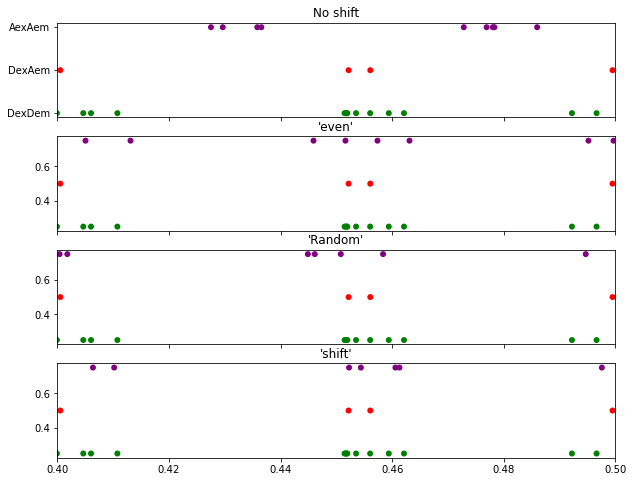

In [16]:
fig, ax = plt.subplots(4,1, figsize=(10,8), sharex=True)
n = 15
stream_color = {frb.Ph_sel(Dex='Dem'):'g', frb.Ph_sel(Dex='Aem'):'r', frb.Ph_sel(Aex='Aem'):'purple'}
bhm.plot_burst_index(bdata_false.models, n, ax=ax[0], stream_color=stream_color, stream_labels=True)
ax[0].set_title('No shift')
bhm.plot_burst_index(bdata_even.models, n, ax=ax[1], stream_color=stream_color)
ax[1].set_title("'even'")
bhm.plot_burst_index(bdata_rand.models, n, ax=ax[2], stream_color=stream_color)
ax[2].set_title("'Random'")
bhm.plot_burst_index(bdata_shift.models, n, ax=ax[3], stream_color=stream_color)
ax[3].set_title("'shift'")

ax[0].set_xlim([0.4, 0.5])